In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6bd6f28f-f87d-4a61-8e63-727ab72fa748',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-13T16:35:03.735Z', 'error_code': 0, 'error_message': None, 'elapsed': 117, 'credit_count': 1, 'notice': None, 'total_count': 8821}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10552, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [10]:
import pandas as pd 

pd.set_option('display.max_columns', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/w1/9zgg66y549123s44_jjg_kww0000gn/T/ipykernel_4696/644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954129e+07,1.954129e+07,False,NaN,1,NaN,NaN,None,2023-11-13T16:10:00.000Z,36887.343877,1.596001e+10,27.2323,0.271014,-0.698708,5.078021,36.922832,38.318899,25.934691,7.208262e+11,50.8076,7.746342e+11,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
1,1027,Ethereum,ETH,ethereum,7772,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202603e+08,1.202603e+08,True,NaN,2,NaN,NaN,None,2023-11-13T16:10:00.000Z,2112.711049,1.215566e+10,42.5722,1.165296,2.731492,10.968730,35.664415,29.379570,14.971968,2.540752e+11,17.9150,2.540752e+11,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
2,825,Tether USDt,USDT,tether,65622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.680446e+10,9.062366e+10,True,NaN,3,NaN,NaN,None,2023-11-13T16:09:00.000Z,1.000402,4.136075e+10,11.8545,-0.007330,-0.002292,-0.001855,0.033171,0.014662,0.185478,8.683931e+10,6.1331,9.066005e+10,None,2023-11-13T16:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-13 16:11:18.910441
3,1839,BNB,BNB,bnb,1757,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517016e+08,1.517016e+08,False,NaN,4,NaN,NaN,None,2023-11-13T16:09:00.000Z,247.241236,8.160087e+08,-2.3675,0.256022,-0.599640,-1.715870,19.537962,15.994693,3.455091,3.750688e+10,2.6451,3.750688e+10,None,2023-11-13T16:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
4,52,XRP,XRP,xrp,1140,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,None,2023-11-13T16:10:00.000Z,0.651621,1.124410e+09,-1.6751,0.207316,-1.877326,-9.116301,33.654130,33.678916,4.302629,3.496127e+10,2.4651,6.516210e+10,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
5,3408,USDC,USDC,usd-coin,14908,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.414343e+10,2.414343e+10,False,NaN,6,NaN,NaN,None,2023-11-13T16:09:00.000Z,1.000246,4.847068e+09,32.8282,0.017530,0.037503,0.023872,-0.003648,0.007373,0.021512,2.414937e+10,1.7056,2.414937e+10,None,2023-11-13T16:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-13 16:11:18.910441
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.221648e+08,5.622911e+08,True,NaN,7,NaN,NaN,None,2023-11-13T16:10:00.000Z,55.982838,2.713345e+09,-22.6641,-0.300718,-3.583985,38.745131,154.082007,194.153230,126.640121,2.363398e+10,1.6664,3.147865e+10,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.526851e+10,3.635027e+10,False,NaN,8,NaN,NaN,None,2023-11-13T16:09:00.000Z,0.370964,3.938743e+08,-18.7498,0.546359,-3.901332,5.021485,49.796438,47.845749,28.729301,1.308334e+10,0.9240,1.669337e+10,None,2023-11-13T16:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
8,74,Dogecoin,DOGE,dogecoin,823,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.41

# Automating the Data Pull

In [23]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6bd6f28f-f87d-4a61-8e63-727ab72fa748',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df
    
    #Automating Data Pull to csv 
    #checks if there is a file in this name
    if not os.path.isfile(r'/Users/lumeenahoro/Downloads/PY/API.csv'):
        df.to_csv(r'/Users/lumeenahoro/Downloads/PY/API.csv',header='column_names')
    else:
        df.to_csv(r'/Users/lumeenahoro/Downloads/PY/API.csv', mode='a', header=False)

        
        

In [24]:
import os 
from time import time
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute 
exit()
    

{'status': {'timestamp': '2023-11-13T17:01:14.683Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8823}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10552, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/var/folders/w1/9zgg66y549123s44_jjg_kww0000gn/T/ipykernel_4696/867350483.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-11-13T17:02:16.137Z', 'error_code': 0, 'error_message': None, 'elapsed': 706, 'credit_count': 1, 'notice': None, 'total_count': 8823}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10552, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

/var/folders/w1/9zgg66y549123s44_jjg_kww0000gn/T/ipykernel_4696/867350483.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

# Transfroming Data

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19541287.00000,19541287.00000,False,NaN,1,NaN,NaN,None,2023-11-13T16:10:00.000Z,36887.34388,15960014080.16153,27.23230,0.27101,-0.69871,5.07802,36.92283,38.31890,25.93469,720826173371.08813,50.80760,774634221420.16003,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
1,1027,Ethereum,ETH,ethereum,7772,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120260281.43504,120260281.43504,True,NaN,2,NaN,NaN,None,2023-11-13T16:10:00.000Z,2112.71105,12155656933.59401,42.57220,1.16530,2.73149,10.96873,35.66442,29.37957,14.97197,254075225343.85257,17.91500,254075225343.85001,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
2,825,Tether USDt,USDT,tether,65622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86804455790.35953,90623656723.10593,True,NaN,3,NaN,NaN,None,2023-11-13T16:09:00.000Z,1.00040,41360751815.41595,11.85450,-0.00733,-0.00229,-0.00186,0.03317,0.01466,0.18548,86839314420.57611,6.13310,90660049054.70000,None,2023-11-13T16:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-13 16:11:18.910441
3,1839,BNB,BNB,bnb,1757,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701553.62083,151701553.62083,False,NaN,4,NaN,NaN,None,2023-11-13T16:09:00.000Z,247.24124,816008693.92504,-2.36750,0.25602,-0.59964,-1.71587,19.53796,15.99469,3.45509,37506879616.76556,2.64510,37506879616.77000,None,2023-11-13T16:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
4,52,XRP,XRP,xrp,1140,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-13T16:10:00.000Z,0.65162,1124409532.39921,-1.67510,0.20732,-1.87733,-9.11630,33.65413,33.67892,4.30263,34961269143.45089,2.46510,65162099966.54000,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
5,3408,USDC,USDC,usd-coin,14908,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24143428672.16486,24143428672.16486,False,NaN,6,NaN,NaN,None,2023-11-13T16:09:00.000Z,1.00025,4847068342.04630,32.82820,0.01753,0.03750,0.02387,-0.00365,0.00737,0.02151,24149372948.59670,1.70560,24149372948.60000,None,2023-11-13T16:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-13 16:11:18.910441
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422164754.62936,562291062.21795,True,NaN,7,NaN,NaN,None,2023-11-13T16:10:00.000Z,55.98284,2713344605.94134,-22.66410,-0.30072,-3.58398,38.74513,154.08201,194.15323,126.64012,23633980900.56184,1.66640,31478649222.35000,None,2023-11-13T16:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 16:11:18.910441
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35268510014.58100,36350273102.30800,False,NaN,8,NaN,NaN,None,2023-11-13T16:09:00.000Z,0.37096,393874335.82211,-18.74980,0.54636,-3.90133,5.02148,49.79644,47.84575,28.72930,13083338107.23854,0.92400,16693367952.95000,None,2023-11-13T16:09:00.000Z,NaN,

In [29]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27101,-0.69871,5.07802,36.92283,38.31890,25.93469
Ethereum,1.16530,2.73149,10.96873,35.66442,29.37957,14.97197
Tether USDt,-0.00733,-0.00229,-0.00186,0.03317,0.01466,0.18548
BNB,0.25602,-0.59964,-1.71587,19.53796,15.99469,3.45509
XRP,0.20732,-1.87733,-9.11630,33.65413,33.67892,4.30263
USDC,0.01753,0.03750,0.02387,-0.00365,0.00737,0.02151
Solana,-0.30072,-3.58398,38.74513,154.08201,194.15323,126.64012
Cardano,0.54636,-3.90133,5.02148,49.79644,47.84575,28.72930
Dogecoin,0.42135,-1.34176,4.65098,30.01327,25.26493,5.00434


In [30]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     0.27101
           quote.USD.percent_change_24h   -0.69871
           quote.USD.percent_change_7d     5.07802
           quote.USD.percent_change_30d   36.92283
           quote.USD.percent_change_60d   38.31890
                                            ...   
Avalanche  quote.USD.percent_change_24h   -2.96986
           quote.USD.percent_change_7d    35.12380
           quote.USD.percent_change_30d   90.45955
           quote.USD.percent_change_60d   87.35835
           quote.USD.percent_change_90d   43.45285
Length: 90, dtype: float64

In [31]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin   quote.USD.percent_change_1h   0.27101
          quote.USD.percent_change_24h -0.69871
          quote.USD.percent_change_7d   5.07802
          quote.USD.percent_change_30d 36.92283
          quote.USD.percent_change_60d 38.31890
...                                         ...
Avalanche quote.USD.percent_change_24h -2.96986
          quote.USD.percent_change_7d  35.12380
          quote.USD.percent_change_30d 90.45955
          quote.USD.percent_change_60d 87.35835
          quote.USD.percent_change_90d 43.45285

[90 rows x 1 columns]

In [35]:
df5.count()

values    90
dtype: int64

In [39]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27101
1,Bitcoin,quote.USD.percent_change_24h,-0.69871
2,Bitcoin,quote.USD.percent_change_7d,5.07802
3,Bitcoin,quote.USD.percent_change_30d,36.92283
4,Bitcoin,quote.USD.percent_change_60d,38.31890
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-2.96986
86,Avalanche,quote.USD.percent_change_7d,35.12380
87,Avalanche,quote.USD.percent_change_30d,90.45955
88,Avalanche,quote.USD.percent_change_60d,87.35835


In [40]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27101
1,Bitcoin,quote.USD.percent_change_24h,-0.69871
2,Bitcoin,quote.USD.percent_change_7d,5.07802
3,Bitcoin,quote.USD.percent_change_30d,36.92283
4,Bitcoin,quote.USD.percent_change_60d,38.31890
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,-2.96986
86,Avalanche,quote.USD.percent_change_7d,35.12380
87,Avalanche,quote.USD.percent_change_30d,90.45955
88,Avalanche,quote.USD.percent_change_60d,87.35835


In [45]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.27101
1,Bitcoin,24h,-0.69871
2,Bitcoin,7d,5.07802
3,Bitcoin,30d,36.92283
4,Bitcoin,60d,38.31890
...,...,...,...
85,Avalanche,24h,-2.96986
86,Avalanche,7d,35.12380
87,Avalanche,30d,90.45955
88,Avalanche,60d,87.35835


# Visualizing Data 

In [46]:
import seaborn as sns 
import matplotlib.pyplot as plt 

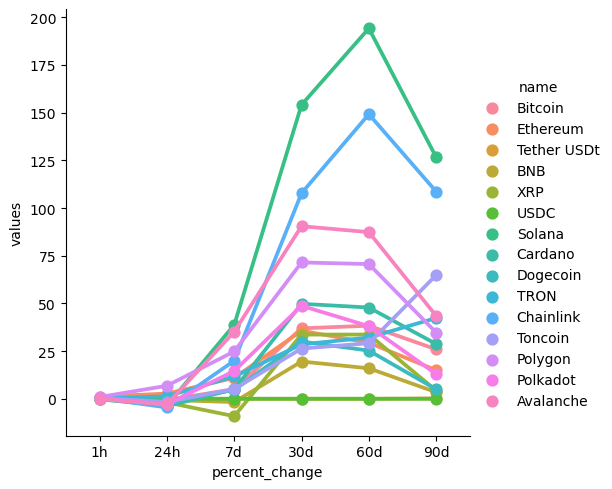

In [47]:
sns.catplot(x='percent_change', y='values',hue='name',data=df7,kind='point')